This notebook continues from notebook 1 and explores the hybrid algorithm created by combining
item based and user based prediction in an ensemble. It should be clear how to performance of my first
algorithm compares to its building block daughters in terms of both accuracy and time.


In [1]:
# import libraries
from surprise import Dataset
from own_algorithms.UserItemKNN import UserItemKNN
from own_algorithms.helper import testing_algorithm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
algo= UserItemKNN()
data= Dataset.load_builtin('ml-100k')
stats= testing_algorithm(algo, data)


In [3]:
knn_data= pd.read_csv('./algo_data/KNNBasic_defaultK_User_Item.csv')
knn_data


,Algorithm,RMSE,MSE,MAE,Fit Time,Predict Time
0,User-Based,0.989869,0.979859,0.783560,0.288202,1.676250
1,Item-Based,0.989914,0.979943,0.782299,0.207619,1.445565


In [4]:
new_row={'Algorithm': 'Hybrid', 'RMSE':stats[0], 'MSE':stats[1], 'MAE':stats[2], 'Fit Time':stats[3], 'Predict Time':stats[4]}

In [5]:
results = knn_data.append(new_row, ignore_index=True)

C:\Users\harvey\AppData\Local\Temp\ipykernel_27456\2610389012.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = knn_data.append(new_row, ignore_index=True)


In [6]:
results

,Algorithm,RMSE,MSE,MAE,Fit Time,Predict Time
0,User-Based,0.989869,0.979859,0.783560,0.288202,1.676250
1,Item-Based,0.989914,0.979943,0.782299,0.207619,1.445565
2,Hybrid,0.969734,0.940407,0.771335,2.130322,5.040482


In [7]:
# pull the accuracy values from the results dataframe
ub= results.loc[0].values[1:4]
ib= results.loc[1].values[1:4]
hb= results.loc[2].values[1:4]


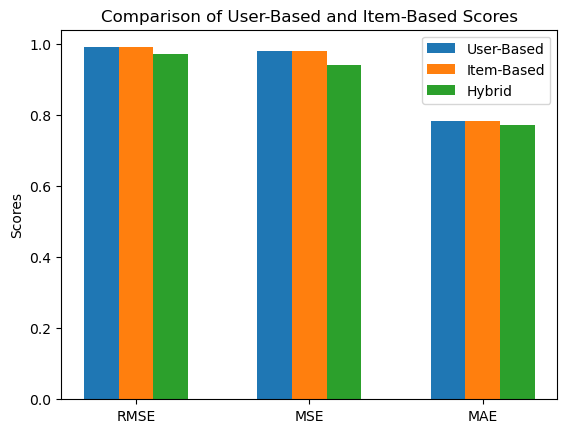

In [11]:
# plotting accuracy scores
labels = ['RMSE', 'MSE', 'MAE']
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, ub, width, label='User-Based')
rects2 = ax.bar(x, ib, width, label='Item-Based')
rects3 = ax.bar(x + width, hb, width, label='Hybrid')


# add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Comparison of User-Based and Item-Based Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


# add the score values above each bar

plt.savefig('./KNN Graphs/Item_vs_User_vs_Hybrid')
plt.show()

In [9]:
# pull the timing values from the results dataframe
ib_t= results.loc[0].values[4:]
ub_t= results.loc[1].values[4:]
hb_t= results.loc[2].values[4:]
print(ib_t)

[0.2882017135620117 1.67625036239624]


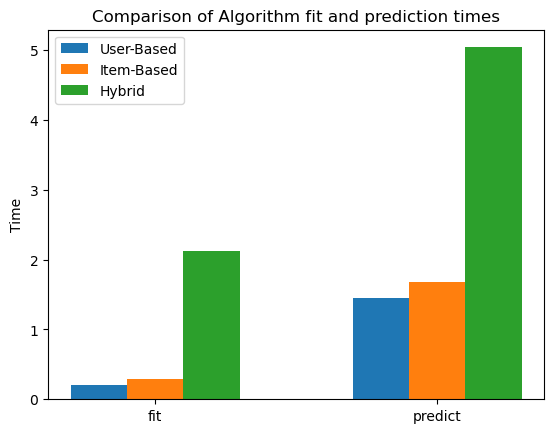

In [12]:
# plotting accuracy scores
labels = ['fit', 'predict']
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects4 = ax.bar(x - width, ub_t, width, label='User-Based')
rects5 = ax.bar(x, ib_t, width, label='Item-Based')
rects6 = ax.bar(x + width, hb_t, width, label='Hybrid')


# add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time')
ax.set_title('Comparison of Algorithm fit and prediction times')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


# add the score values above each bar

plt.savefig('./KNN Graphs/Item_vs_User_vs_Hybrid_timing')

plt.show()